In [ ]:
# !pip install opencv-python
# !pip install matplotlib

: 

In [1]:
import cv2
from matplotlib import pyplot as plt

In [7]:
import numpy as np

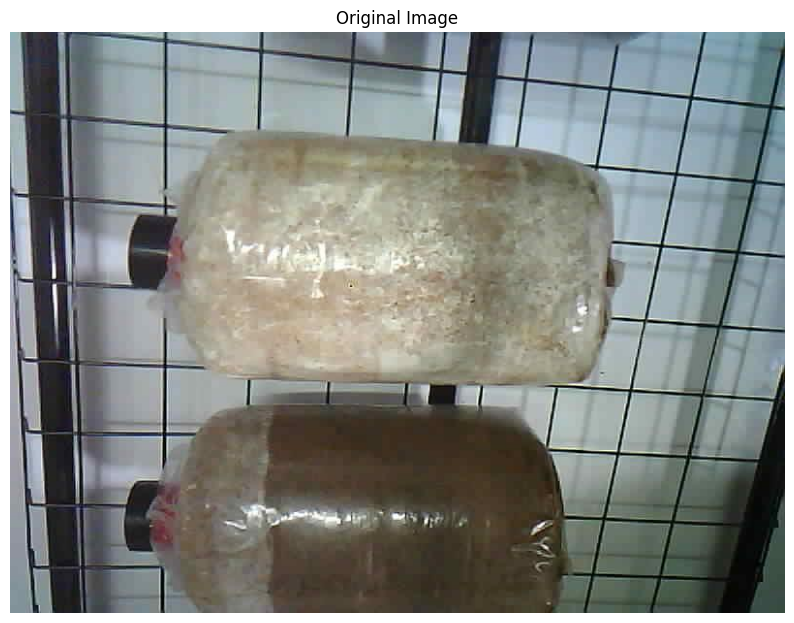

In [2]:
# Step 2: Load an image from file
img = cv2.imread('97.jpg', cv2.IMREAD_COLOR)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

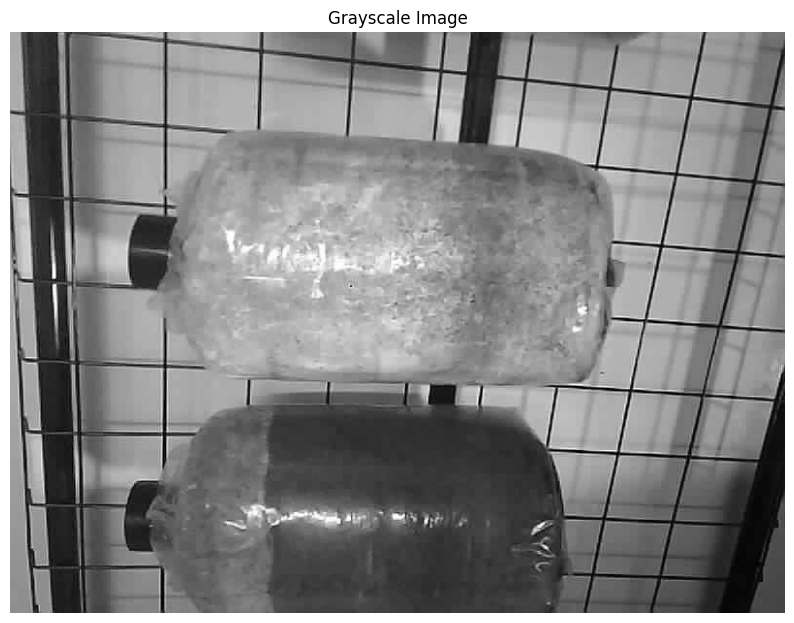

In [3]:
# Step 3: Convert it to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10,10))
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

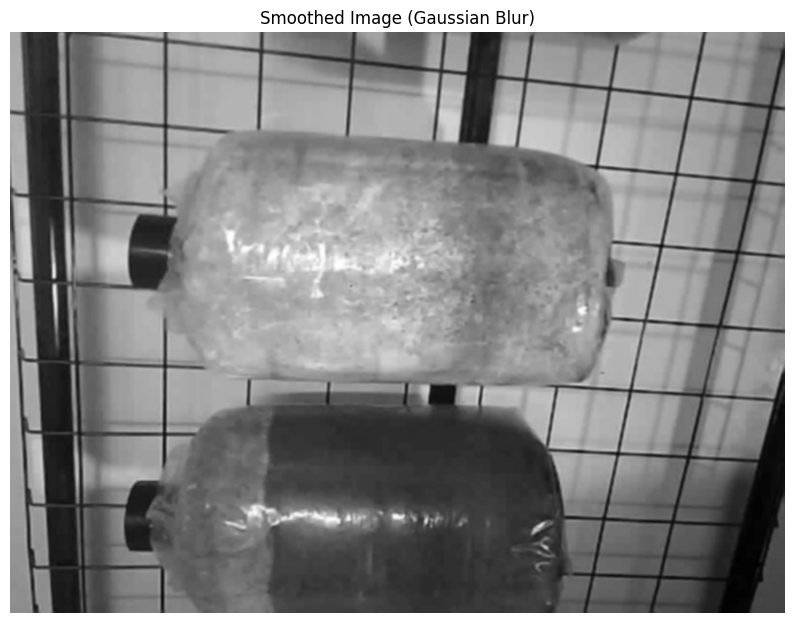

In [4]:
# Step 4: Apply Gaussian blur for smoothing the image
blur = cv2.GaussianBlur(gray,(5,5),0)
plt.figure(figsize=(10,10))
plt.imshow(blur, cmap='gray')
plt.title('Smoothed Image (Gaussian Blur)')
plt.axis('off')
plt.show()

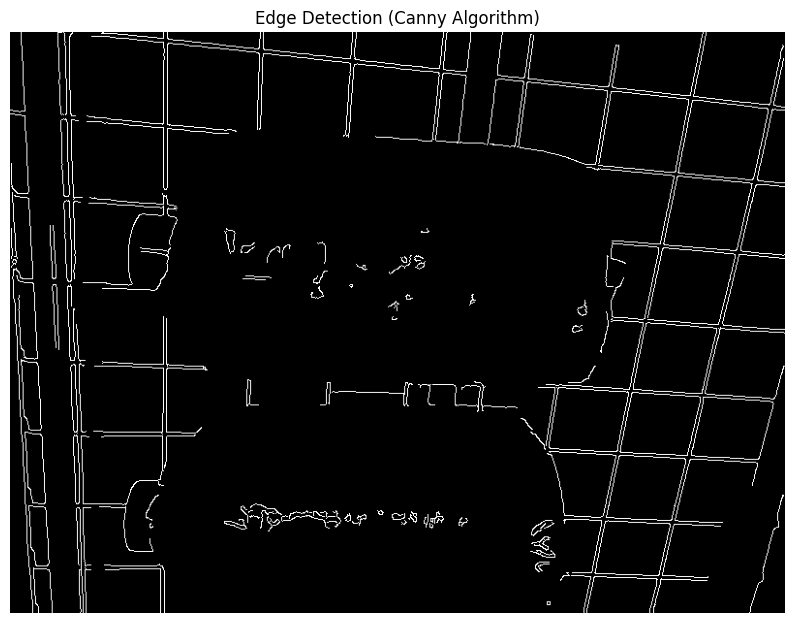

In [5]:
# Step 5: Detect edges with Canny algorithm
edges = cv2.Canny(blur,100,200)
plt.figure(figsize=(10,10))
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Canny Algorithm)')
plt.axis('off')
plt.show()

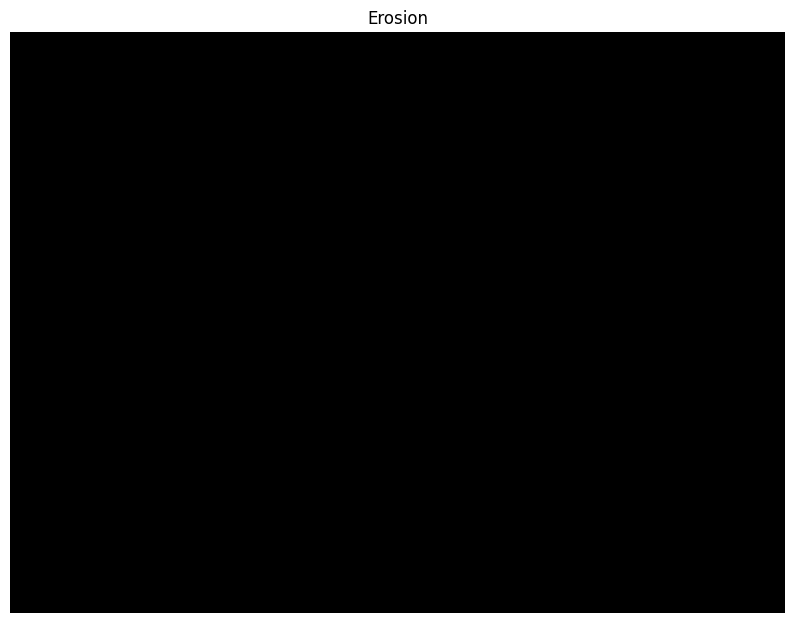

In [8]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(edges, kernel, iterations = 1)
plt.figure(figsize=(10,10))
plt.imshow(erosion, cmap='gray')
plt.title('Erosion')
plt.axis('off')
plt.show()

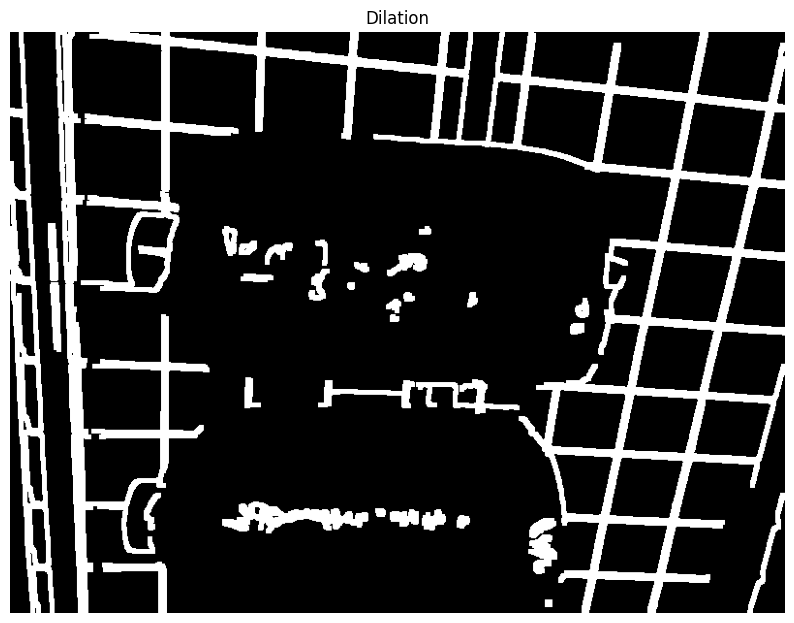

In [9]:
# Step 2: Dilation
dilation = cv2.dilate(edges, kernel, iterations = 1)
plt.figure(figsize=(10,10))
plt.imshow(dilation, cmap='gray')
plt.title('Dilation')
plt.axis('off')
plt.show()

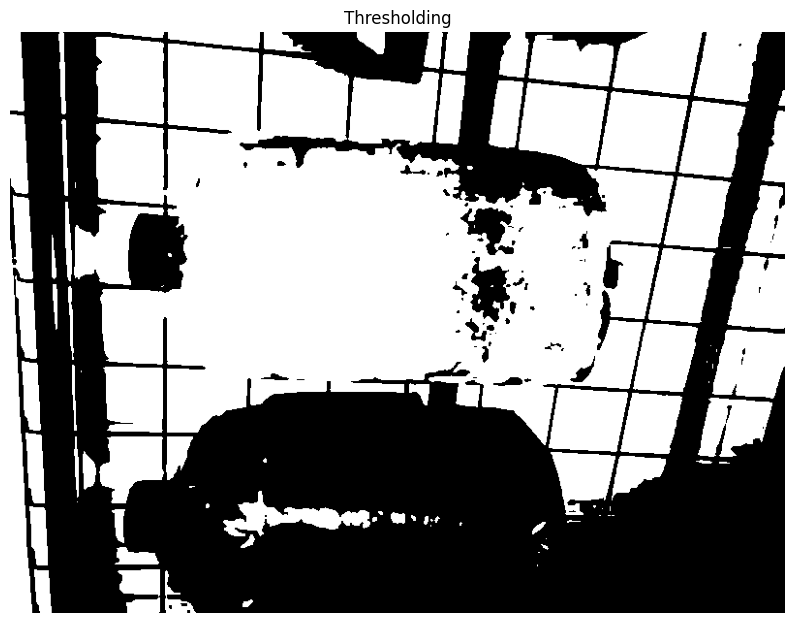

In [10]:
_, thresh = cv2.threshold(blur,127,255,cv2.THRESH_BINARY)
plt.figure(figsize=(10,10))
plt.imshow(thresh, cmap='gray')
plt.title('Thresholding')
plt.axis('off')
plt.show()

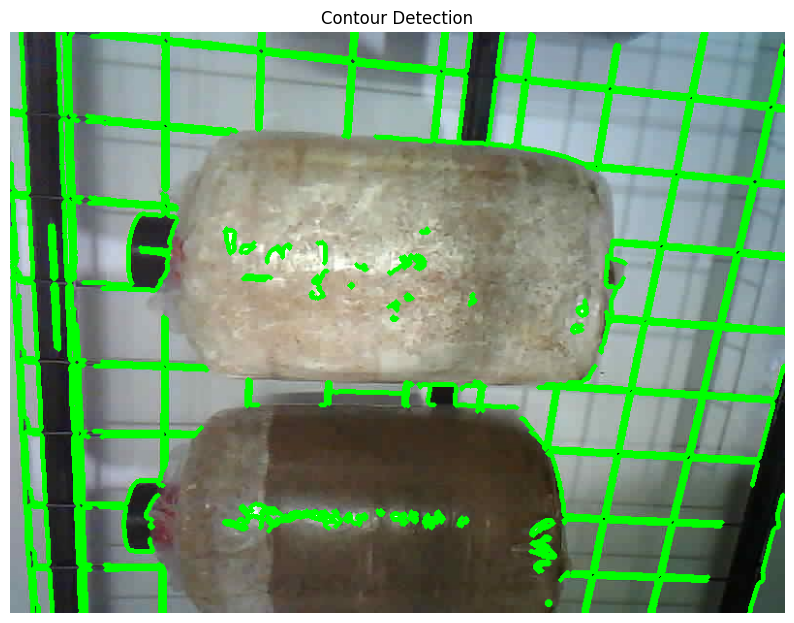

In [11]:
# Step 4: Contour Detection
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contours = cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title('Contour Detection')
plt.axis('off')
plt.show()

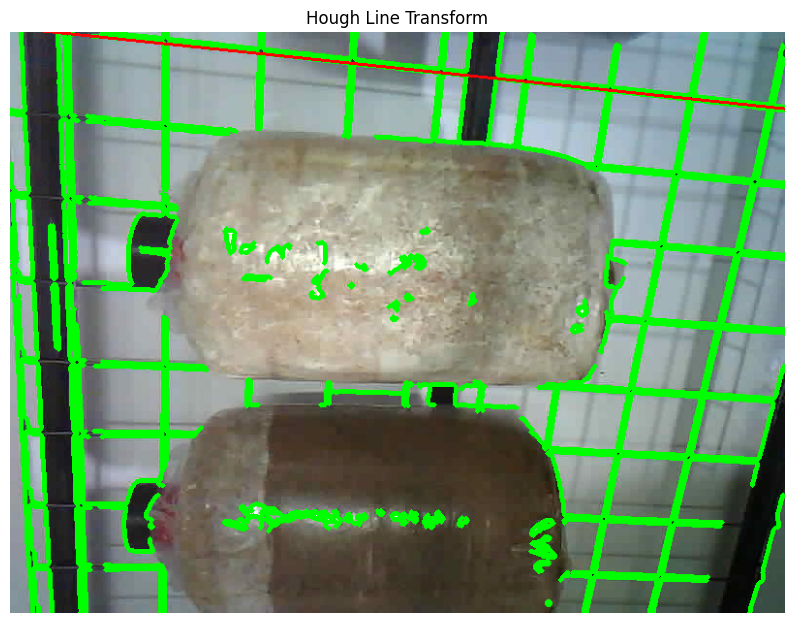

In [12]:
# Step 5: Hough Transform Line Detection
lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Hough Line Transform')
plt.axis('off')
plt.show()

## Image Segmentation

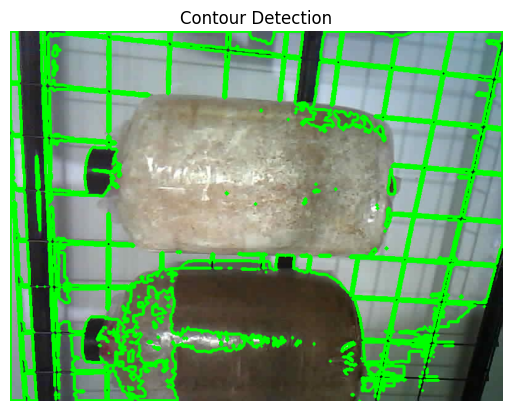

In [14]:
# Load an image from file
img = cv2.imread('97.jpg', cv2.IMREAD_COLOR)
# Convert to grayscale 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Thresholding
_, thresh = cv2.threshold(gray,100,255,cv2.THRESH_BINARY)

# Contour Detection
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on image
img_contours = cv2.drawContours(img, contours, -1, (0, 255, 0), 3)
plt.imshow(cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB))
plt.title('Contour Detection')
plt.axis('off')
plt.show()

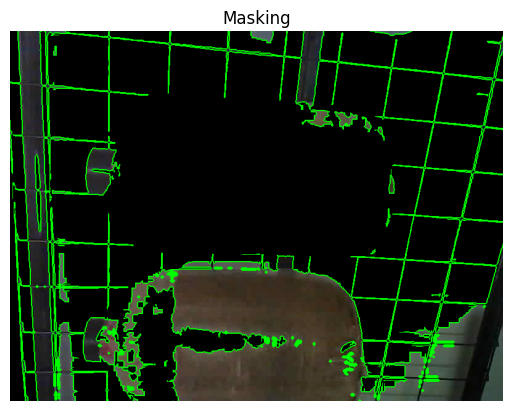

In [15]:
# Removing small noise contours by checking their area size
contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 50] # Modify this value based on your needs

# Masking to remove background 
masked_img = img.copy()
cv2.drawContours(masked_img, contours, -1, (0,0,0), cv2.FILLED)
plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
plt.title('Masking')
plt.axis('off')
plt.show()

In [16]:

# Finding biggest contour 
biggest = max(contours, key=cv2.contourArea)
x,y,w,h = cv2.boundingRect(biggest)


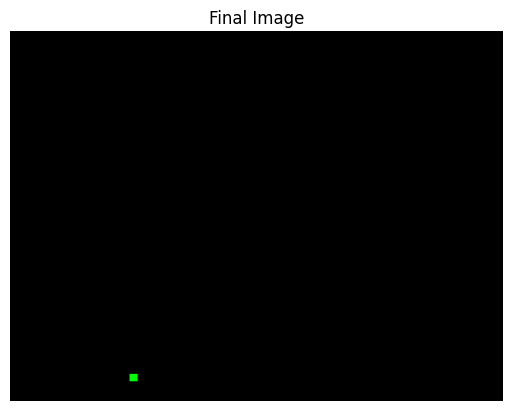

In [28]:
# Removing smaller contours
small_area = 50 # Modify this value based on your needs
for cnt in contours:
    if cv2.contourArea(cnt) < small_area and cv2.boundingRect(cnt)[0] > x and cv2.boundingRect(cnt)[1] > y: 
        (x,y,w,h) = cv2.boundingRect(cnt)

# Creating final image with removed background
result = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
cv2.rectangle(result,(x,y),(x+w,y+h),(0,255,0),-1)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Final Image')
plt.axis('off')
plt.show()

In [26]:
def remove_straight_lines(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply adaptive thresholding to convert image into binary format 
    binary = cv2.adaptiveThreshold(~gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,15,-10)
    
    # Perform morphological operations to remove horizontal and vertical straight lines
    kernel = np.ones((3,3),np.uint8)
    erosion = cv2.erode(binary,kernel,iterations = 1)
    dilation = cv2.dilate(erosion,kernel,iterations = 1)
    
    # Find contours in the image
    cnts, _ = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    # Removing small noise contours by checking their area size
    contours = [cnt for cnt in cnts if cv2.contourArea(cnt) > 50] # Modify this value based on your needs

    # plt.imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
        
    for c in cnts:
        # Get bounding box coordinates and width/height of the contour
        x, y, w, h = cv2.boundingRect(c)
        
        # If height or width is less than 10 pixels (you can adjust this value), it's likely a straight line
        if w < 10 or h < 10:  
            # Draw black rectangle on the image where we found straight lines
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), -1)
    cv2.drawContours(image, contours, -1, (0,255,0), cv2.FILLED)
            
    return image

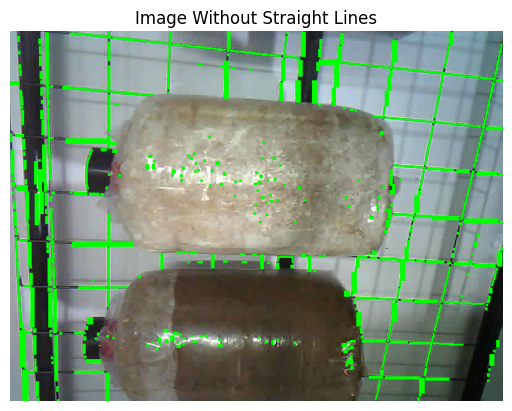

In [27]:
# Load an image from file
img = cv2.imread('97.jpg', cv2.IMREAD_COLOR)

# Remove straight lines from the image
img_without_lines = remove_straight_lines(img)

plt.imshow(cv2.cvtColor(img_without_lines, cv2.COLOR_BGR2RGB))
plt.title('Image Without Straight Lines')
plt.axis('off')
plt.show()

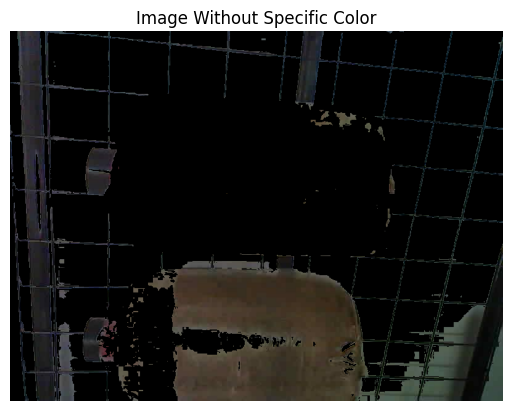

In [ ]:
def remove_color(image):
    # Define the range of color to be replaced. Here we are defining a range for black color (0, 0, 0)
    lower = np.array([76, 0, 0])
    upper = np.array([100, 100, 100]) # You can adjust this values based on your needs
    
    # Threshold the HSV image to get only specific colors
    mask = cv2.inRange(image, lower, upper)
    
    # Bitwise-AND original image and mask
    result = cv2.bitwise_and(image, image, mask=mask)

    return result

# Load an image from file
img = cv2.imread('97.jpg', cv2.IMREAD_COLOR)

# Remove specific color from the image
img_without_color = remove_color(img)

plt.imshow(cv2.cvtColor(img_without_color, cv2.COLOR_BGR2RGB))
plt.title('Image Without Specific Color')
plt.axis('off')
plt.show()

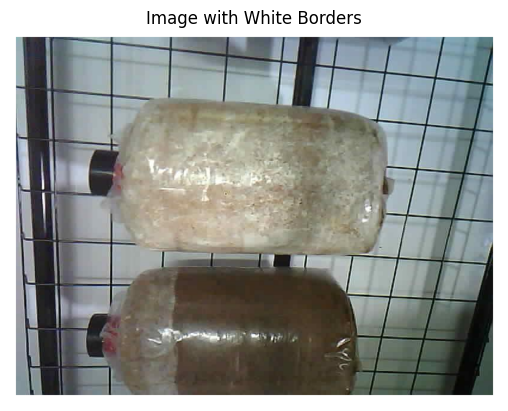

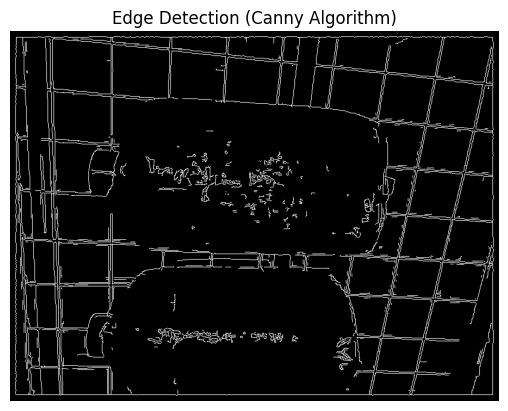

In [42]:
# Step 1: Replace dark and black pixels with white ones
white_image = cv2.copyMakeBorder(img, 10, 10, 10, 10, borderType=cv2.BORDER_CONSTANT, value=[255, 255, 255])
plt.imshow(cv2.cvtColor(white_image, cv2.COLOR_BGR2RGB))
plt.title('Image with White Borders')
plt.axis('off')
plt.show()

# Step 2: Apply Canny edge detection on the modified image
edges = cv2.Canny(white_image,100,200)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Canny Algorithm)')
plt.axis('off')
plt.show()


In [44]:
from PIL import Image

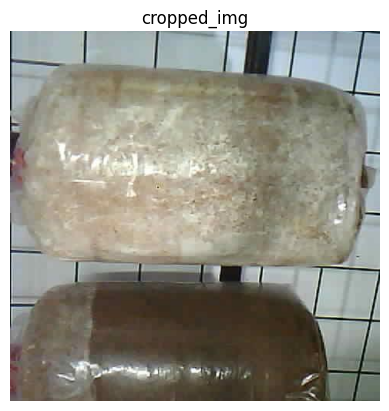

In [49]:
# Convert the image color format from BGR to RGB, which is compatible with PIL
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

# Transform array-style image to PIL Image object
pil_image = Image.fromarray(img_rgb)

# Calculate the new size of the cropped image by taking 80% of its original size
new_width, new_height = int(pil_image.size[0] * 0.6), int(pil_image.size[1] * 0.8)

# Calculate coordinates to center the cropped image
left = (pil_image.size[0] - new_width) // 2
top = (pil_image.size[1] - new_height) // 2
right = left + new_width
bottom = top + new_height

# Crop the image
cropped_img = pil_image.crop((left, top, right, bottom))

plt.imshow(cropped_img, cmap='gray')
plt.title('cropped_img')
plt.axis('off')
plt.show()

In [ ]:
# Convert the image color format from BGR to RGB, which is compatible with PIL
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

# Transform array-style image to PIL Image object
pil_image = Image.fromarray(img_rgb)

# Calculate the new size of the cropped image by taking 80% of its original size
new_width, new_height = int(pil_image.size[0] * 0.6), int(pil_image.size[1] * 0.8)

# Calculate coordinates to center the cropped image
left = (pil_image.size[0] - new_width) // 2
top = (pil_image.size[1] - new_height) // 2
right = left + new_width
bottom = top + new_height

# Crop the image
cropped_img = pil_image.crop((left, top, right, bottom))

plt.imshow(cropped_img, cmap='gray')
plt.title('cropped_img')
plt.axis('off')
plt.show()